# Model evaluation on test data

In [1]:
import os

# Walk through kitchenware-dataset directory and list number of file
for path, dirs, files in os.walk('../datasets/kitchenware-dataset'):
      print(f"There are {len(dirs)} directories and {len(files)} images in '{path}'.")

There are 3 directories and 0 images in '../datasets/kitchenware-dataset'.
There are 0 directories and 6 images in '../datasets/kitchenware-dataset\eval-images'.
There are 6 directories and 0 images in '../datasets/kitchenware-dataset\test'.
There are 0 directories and 897 images in '../datasets/kitchenware-dataset\test\cup'.
There are 0 directories and 375 images in '../datasets/kitchenware-dataset\test\fork'.
There are 0 directories and 499 images in '../datasets/kitchenware-dataset\test\glass'.
There are 0 directories and 625 images in '../datasets/kitchenware-dataset\test\knife'.
There are 0 directories and 752 images in '../datasets/kitchenware-dataset\test\plate'.
There are 0 directories and 660 images in '../datasets/kitchenware-dataset\test\spoon'.
There are 6 directories and 0 images in '../datasets/kitchenware-dataset\train'.
There are 0 directories and 1136 images in '../datasets/kitchenware-dataset\train\cup'.
There are 0 directories and 557 images in '../datasets/kitchenwa

## Load test images and evaluate the model

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Path of test images
test_dir = '../datasets/kitchenware-dataset/test'

# Test data
test_datagen = ImageDataGenerator()
test_ds = test_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(256, 256),
                                            class_mode='categorical',
                                            shuffle=False)

Found 3802 images belonging to 6 classes.


In [4]:
# Model path
model_path = '../models/efficientnetb0_14_0.962.h5'

# Loat the model
model = tf.keras.models.load_model(filepath=model_path)

In [5]:
# Evaluate the model on test set
model.evaluate(test_ds)

119/119 [==============================] - 538s 4s/step - loss: 0.1400 - accuracy: 0.9634


[0.14001742005348206, 0.9634402990341187]

## Making predictions with the trained model

In [6]:
# Make predictions with model (returns probabilities)
y_pred_probs = model.predict(test_ds)

119/119 [==============================] - 557s 5s/step


In [7]:
# Shape of y_pred_probs
y_pred_probs.shape

(3802, 6)

In [8]:
# First 5 y_pred_probs
y_pred_probs[:5]

array([[1.00000000e+00, 1.00968504e-10, 3.43742244e-08, 1.88426885e-10,
        8.27735189e-12, 1.26931382e-10],
       [1.00000000e+00, 9.56348195e-11, 4.88206675e-09, 3.23192098e-11,
        2.71181931e-11, 1.77088240e-11],
       [9.99988914e-01, 3.32587152e-10, 1.11435966e-05, 1.07708509e-09,
        1.00646436e-11, 5.33422369e-11],
       [9.99996185e-01, 1.78466912e-08, 2.22192944e-06, 1.22752928e-08,
        1.54078907e-06, 2.93277882e-08],
       [1.00000000e+00, 7.19303173e-10, 3.16905862e-08, 2.83148482e-09,
        2.24065051e-08, 8.58224602e-09]], dtype=float32)

In [9]:
# Get the predictions
y_pred = y_pred_probs.argmax(axis=1)

# First five predictions
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [10]:
# Get test labels
y_true = test_ds.labels
    
# First 5 y_true (all 0's due to unshuffling)
y_true[:5]

array([0, 0, 0, 0, 0])

In [11]:
# Total number of true labels
len(y_true)

3802

## Evaluate model predictions with test labels

In [13]:
import numpy as np

# Get the class names
class_names = np.array(list(test_ds.class_indices.keys()))
class_names

array(['cup', 'fork', 'glass', 'knife', 'plate', 'spoon'], dtype='<U5')

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def show_confusion_matrix(cm, classes, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes,
                annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show()

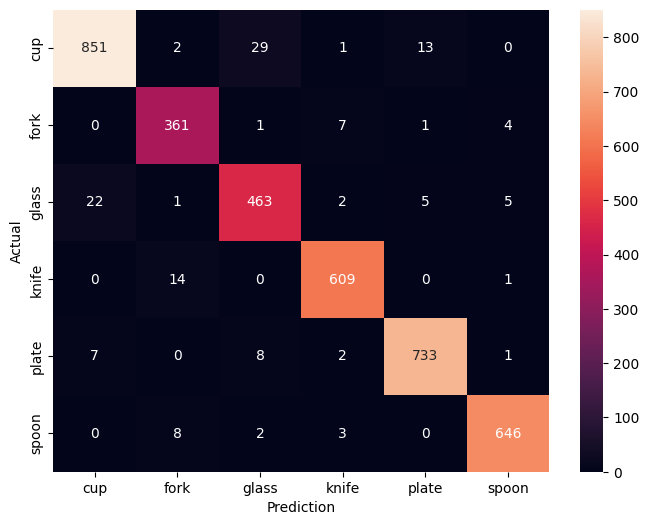

In [19]:
# Compute confusion matrix
confusion_mtx = tf.math.confusion_matrix(labels=y_true, predictions=y_pred, num_classes=len(class_names))

# Show confusion matrix
show_confusion_matrix(confusion_mtx, class_names, figsize=(8, 6))

In [20]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       896
           1       0.94      0.97      0.95       374
           2       0.92      0.93      0.93       498
           3       0.98      0.98      0.98       624
           4       0.97      0.98      0.98       751
           5       0.98      0.98      0.98       659

    accuracy                           0.96      3802
   macro avg       0.96      0.96      0.96      3802
weighted avg       0.96      0.96      0.96      3802



In [21]:
# Get dictionary of the classfication report
class_report_dict = classification_report(y_true, y_pred, output_dict=True)
class_report_dict

{'0': {'precision': 0.9670454545454545,
  'recall': 0.9497767857142857,
  'f1-score': 0.9583333333333333,
  'support': 896},
 '1': {'precision': 0.9352331606217616,
  'recall': 0.9652406417112299,
  'f1-score': 0.9500000000000001,
  'support': 374},
 '2': {'precision': 0.9204771371769384,
  'recall': 0.929718875502008,
  'f1-score': 0.9250749250749252,
  'support': 498},
 '3': {'precision': 0.9759615384615384,
  'recall': 0.9759615384615384,
  'f1-score': 0.9759615384615384,
  'support': 624},
 '4': {'precision': 0.9747340425531915,
  'recall': 0.9760319573901465,
  'f1-score': 0.9753825681969395,
  'support': 751},
 '5': {'precision': 0.9832572298325722,
  'recall': 0.9802731411229135,
  'f1-score': 0.9817629179331306,
  'support': 659},
 'accuracy': 0.963440294581799,
 'macro avg': {'precision': 0.9594514271985761,
  'recall': 0.9628338233170203,
  'f1-score': 0.9610858804999779,
  'support': 3802},
 'weighted avg': {'precision': 0.9636084492573628,
  'recall': 0.963440294581799,
  '

In [29]:
# Extract the class names and their respective f1-scores
# Dict to store class name and f1-score
class_f1_scores = {}
for k, v in class_report_dict.items():
    if k == 'accuracy': # stop once we get to accuracy key
        break
    else:
        # append class names and f1-scores to the class_f1_scores
        class_f1_scores[class_names[int(k)]] = v['f1-score']
        
class_f1_scores

{'cup': 0.9583333333333333,
 'fork': 0.9500000000000001,
 'glass': 0.9250749250749252,
 'knife': 0.9759615384615384,
 'plate': 0.9753825681969395,
 'spoon': 0.9817629179331306}

In [33]:
import pandas as pd

# Convert f1-scores into dataframe for visualization
f1_scores_df = pd.DataFrame({'class_name': list(class_f1_scores.keys()),
                             'f1-score': list(class_f1_scores.values())})

# Save f1-scores in descending order
f1_scores_df = f1_scores_df.sort_values(by='f1-score', ascending=False)
f1_scores_df

,class_name,f1-score
5,spoon,0.981763
3,knife,0.975962
4,plate,0.975383
0,cup,0.958333
1,fork,0.950000
2,glass,0.925075


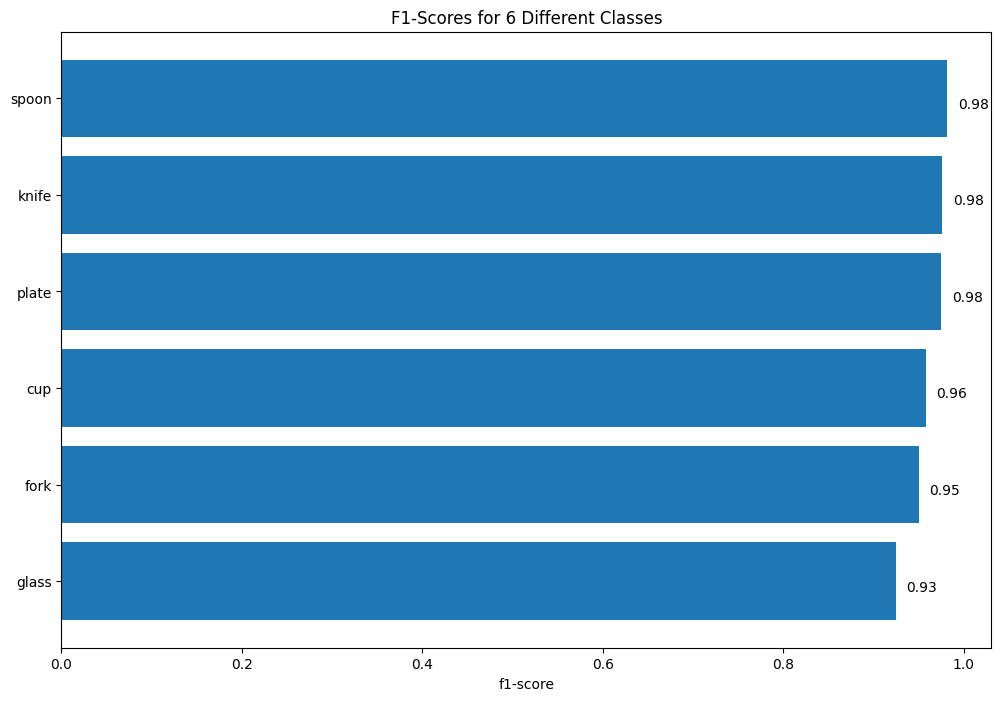

In [37]:
# Visualize the f1-scores
fig, ax = plt.subplots(figsize=(12, 8))
scores = ax.barh(np.arange(len(f1_scores_df)), f1_scores_df['f1-score'].values)
ax.set_yticks(np.arange(len(f1_scores_df)))
ax.set_yticklabels(list(f1_scores_df['class_name']))
ax.set_xlabel('f1-score')
ax.set_title(f'F1-Scores for {len(class_names)} Different Classes')
ax.invert_yaxis() # reverse the order yticklabels

# Function to add labels to each bar
def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
    for rect in rects:
        width = rect.get_width()
        ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
                f'{width:.2f}',
                ha='center', va='bottom')

autolabel(scores)

## Visualizing predictions on test images

In [143]:
# Function to preprocess images
def preprocess_img(filename, img_shape=(256, 256), channels=3, scale=True):
    # Read in target file (an image)
    img = tf.io.read_file(filename)
    # Decode the read file
    img = tf.image.decode_image(img, channels=channels)
    # Resize the image
    img = tf.image.resize(img, size=img_shape)
    
    # Check if the trained model has pre-built scaling layer or not
    if scale:
        # rescale the image if the model has no image
        return img/255.
    else:
        return img

1/1 [==============================] - 0s 103ms/step


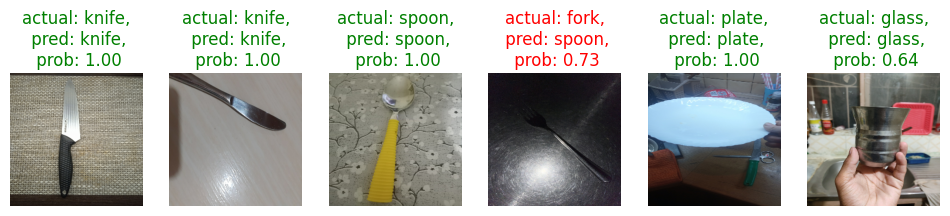

In [163]:
import os
import random

# Load a few random images from the test dataset
# Make predictions and plot original images along with model predicted labels
plt.figure(figsize=(12,10))

for i in np.arange(6):
    # Choose a random image from a random class
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + '/' + class_name))
    filepath = test_dir + '/' + class_name + '/' + filename
    
    # Load the image and make predictions
    img = preprocess_img(filepath, scale=False) # EfficientNetB0 has prebuilt scaling layer
    img_expanded = tf.expand_dims(img, axis=0) # add batch dimension in the first axis of image shape
    pred_prob = model.predict(img_expanded)
    pred_class = class_names[pred_prob.argmax()] # find the predicted class
    
    # Plot the image(s)
    plt.subplot(1, 6, i+1)
    plt.imshow(img/255.)
    
    if class_name == pred_class: # change the color of text based on whether prediction is right or wrong
        title_color = 'g'
    else:
        title_color = 'r'
    plt.title(f'actual: {class_name},\n pred: {pred_class},\n prob: {pred_prob.max():.2f}', c=title_color)
    
    plt.axis('off');

## Finding the most wrong predictions

In [171]:
# Get the file names of all of the test images
filepaths = []
for filepath in test_ds.filenames:
    filepaths.append(os.path.join(test_dir, filepath))
    
filepaths[:10]

['../datasets/kitchenware-dataset/test\\cup\\0000.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0008.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0011.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0015.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0035.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0050.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0051.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0056.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0072.jpg',
 '../datasets/kitchenware-dataset/test\\cup\\0112.jpg']

In [172]:
# Create dataframe of image filepath, y_true, y_pred, maximum pred_probs
# y_true class names, y_pred class names
pred_df = pd.DataFrame({'img_path': filepaths,
                        'y_true': y_true,
                        'y_pred': y_pred,
                        'pred_conf': y_pred_probs.max(axis=1),
                        'y_true_classname': [class_names[i] for i in y_true],
                        'y_pred_classname': [class_names[i] for i in y_pred]})

pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,../datasets/kitchenware-dataset/test\cup\0000.jpg,0,0,1.000000,cup,cup
1,../datasets/kitchenware-dataset/test\cup\0008.jpg,0,0,1.000000,cup,cup
2,../datasets/kitchenware-dataset/test\cup\0011.jpg,0,0,0.999989,cup,cup
3,../datasets/kitchenware-dataset/test\cup\0015.jpg,0,0,0.999996,cup,cup
4,../datasets/kitchenware-dataset/test\cup\0035.jpg,0,0,1.000000,cup,cup


In [173]:
# Create new column 'pred_correct' for predictions where y_true and y_pred are same
pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_pred']
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,../datasets/kitchenware-dataset/test\cup\0000.jpg,0,0,1.000000,cup,cup,True
1,../datasets/kitchenware-dataset/test\cup\0008.jpg,0,0,1.000000,cup,cup,True
2,../datasets/kitchenware-dataset/test\cup\0011.jpg,0,0,0.999989,cup,cup,True
3,../datasets/kitchenware-dataset/test\cup\0015.jpg,0,0,0.999996,cup,cup,True
4,../datasets/kitchenware-dataset/test\cup\0035.jpg,0,0,1.000000,cup,cup,True


In [174]:
# Get the wrong prediction from the 'pred_correct' column
# Sort the order by 'pred_conf' in descending order
wrong_pred_df = pred_df[pred_df['pred_correct'] == False].sort_values(by='pred_conf', ascending=False)
wrong_pred_df.head(20)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
1592,../datasets/kitchenware-dataset/test\glass\616...,2,4,0.999981,glass,plate,False
1408,../datasets/kitchenware-dataset/test\glass\279...,2,0,0.999963,glass,cup,False
2519,../datasets/kitchenware-dataset/test\plate\143...,4,2,0.999962,plate,glass,False
3317,../datasets/kitchenware-dataset/test\spoon\227...,5,2,0.999940,spoon,glass,False
2953,../datasets/kitchenware-dataset/test\plate\679...,4,2,0.999923,plate,glass,False
1872,../datasets/kitchenware-dataset/test\knife\174...,3,1,0.999761,knife,fork,False
196,../datasets/kitchenware-dataset/test\cup\2083.jpg,0,2,0.999614,cup,glass,False
2405,../datasets/kitchenware-dataset/test\plate\014...,4,2,0.999544,plate,glass,False
610,../datasets/kitchenware-dataset/test\cup\6749.jpg,0,2,0.999453,cup,glass,False
783,../datasets/kitchenware-dataset/test\cup\8380.jpg,0,2,0.999187,cup,glass,False


C:\Users\awon\AppData\Local\Temp\ipykernel_4092\1441948768.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, cols, i+1)


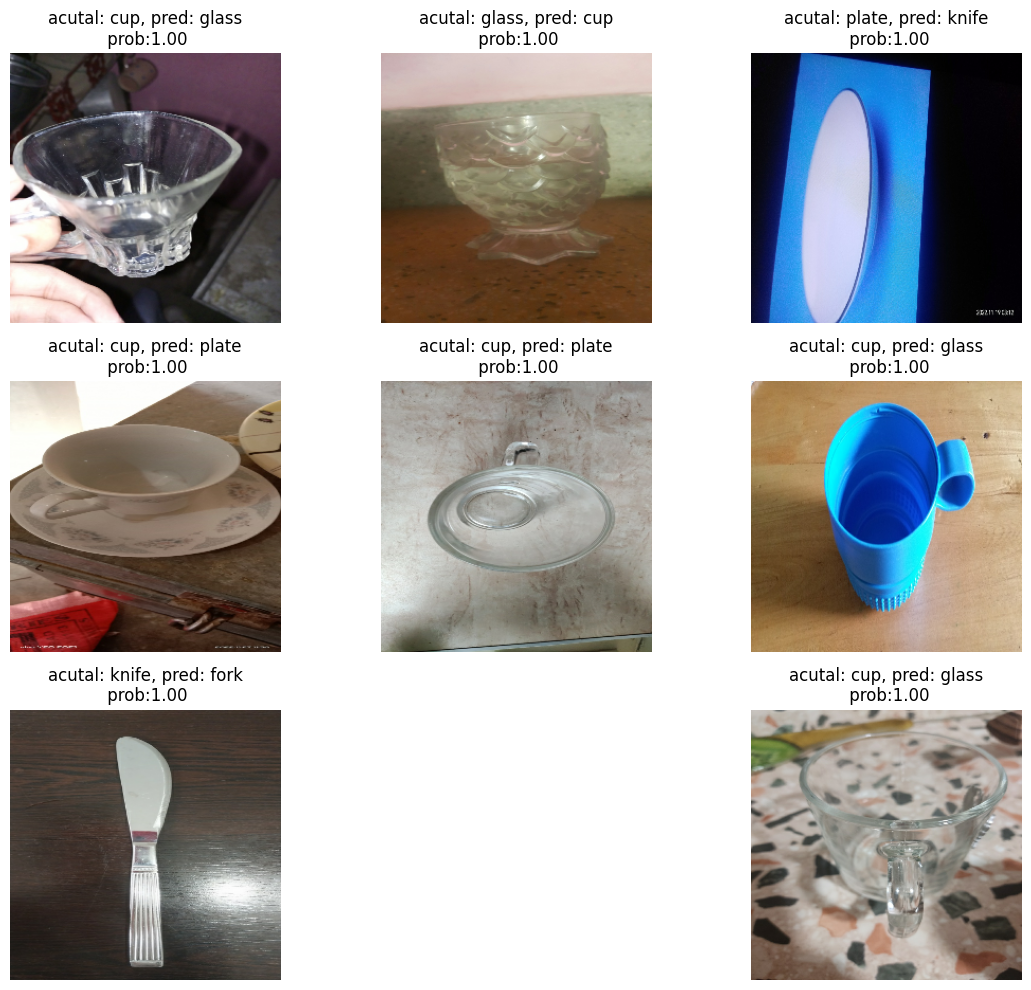

In [194]:
# Visualize some of the most wrong examples
imgs_to_view = 9
start_index = 10 # change the start index to view more
rows = 3
cols = 3

plt.figure(figsize=(12, 10))
for i, row in enumerate(wrong_pred_df[start_index:start_index+imgs_to_view].itertuples()):
    plt.subplot(rows, cols, i+1)
    img = preprocess_img(row[1], scale=True)
    _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
    plt.imshow(img)
    plt.title(f'acutal: {y_true}, pred: {y_pred}\n prob:{pred_prob:.2f}')
    plt.axis('off')
    plt.tight_layout()

## Make model predictions on unseen images

In [199]:
# Path of unseen images
eval_imgs_dir = '../datasets/kitchenware-dataset/eval-images'

# Get the images filepaths
custom_imgs = [eval_imgs_dir + '/' + img_path for img_path in os.listdir(eval_imgs_dir)]
custom_imgs

['../datasets/kitchenware-dataset/eval-images/0196.jpg',
 '../datasets/kitchenware-dataset/eval-images/0820.jpg',
 '../datasets/kitchenware-dataset/eval-images/1956.jpg',
 '../datasets/kitchenware-dataset/eval-images/4470.jpg',
 '../datasets/kitchenware-dataset/eval-images/4567.jpg',
 '../datasets/kitchenware-dataset/eval-images/5768.jpg']

1/1 [==============================] - 0s 108ms/step


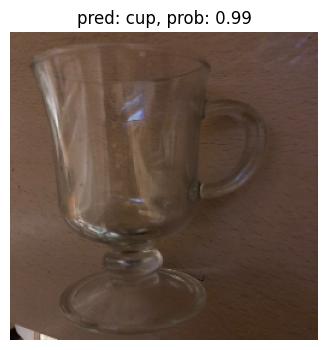

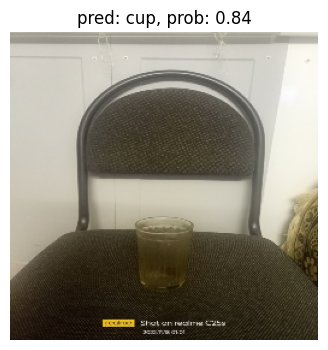

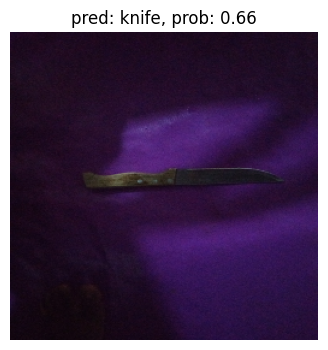

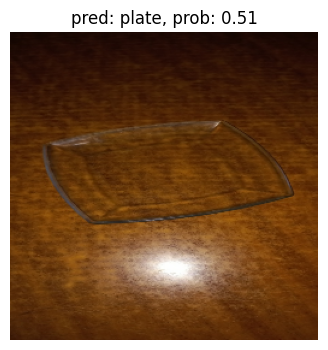

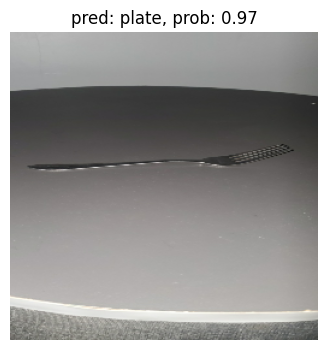

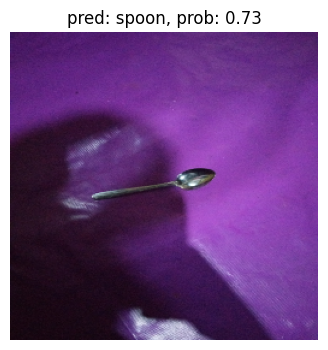

In [205]:
# Make predictions on custom images
for img in custom_imgs:
    img = preprocess_img(img, scale=False) # load in target image and turn it into tensor
    pred_prob = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_prob.argmax()]
    
    # Plot the image with appropriate annotations
    plt.figure(figsize=(4, 4))
    plt.imshow(img/255.) # imshow() requires float inputs to be normalized
    plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
    plt.axis(False)